In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import math
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
plt.rcParams['figure.figsize'] = [15,8]
from warnings import filterwarnings
filterwarnings('ignore')

## Titanic Challenge - 
The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

In [2]:
train = pd.read_csv('train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### EDA Steps:

1. Univariate Analysis - Look in to Columns Individually and try to plot them and see the patterns.
2. Bivariate Analysis - Analysis of Predictor vs Target Variable.
 * Num vs Num - Scatterplot
 * Num vs Cat - Boxplot / ViolinPlot
 * Cat vs Cat - Crosstab and then see if you can countplot
 * Two Faces Plot Basis Category - Facetgrid Plot
3. Missing Values - Columns have missing values. (More than 90% of Data is missing and there is no way to fill it, then drop the variable)
4. Outlier Analysis - Boxplot or Normal Distribution. Boxplots (q1-1.5*IQR | q3 + 1.5*IQR). ND(<3-3>)
5. Feature Engineering - Generalise the information in the data. This really helps in improving the overall performance of ML.
6. Scaling and Transformation if needed. Remember : Never ever scale dummy variables - 0 and 1.

<AxesSubplot:>

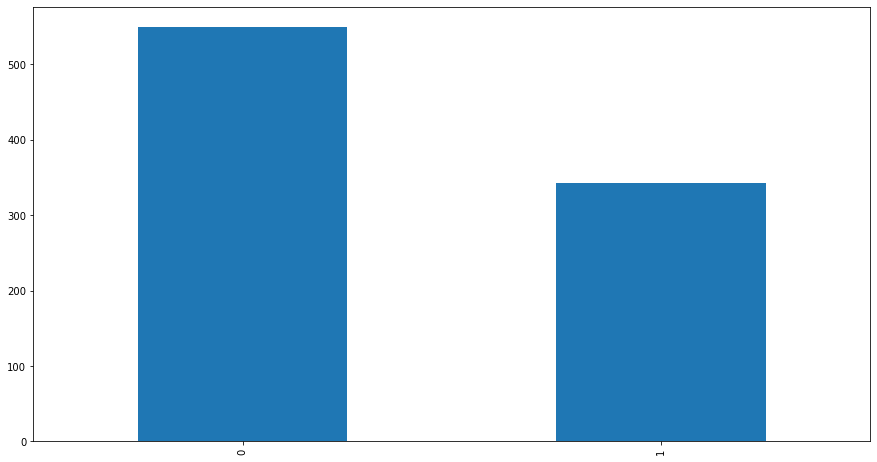

In [3]:
# Univariate Analysis - Target Variable
# Survived-
train.Survived.value_counts().plot(kind='bar')

<AxesSubplot:xlabel='Survived', ylabel='count'>

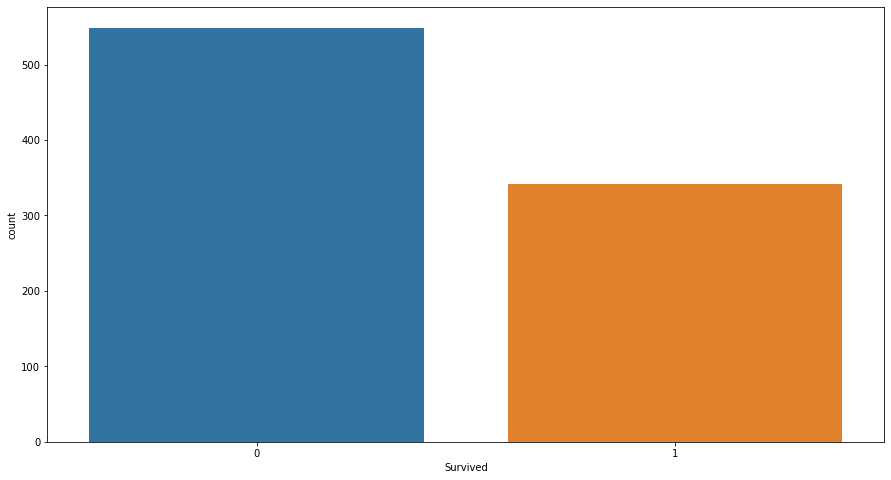

In [4]:
sns.countplot(x = train.Survived)

<AxesSubplot:>

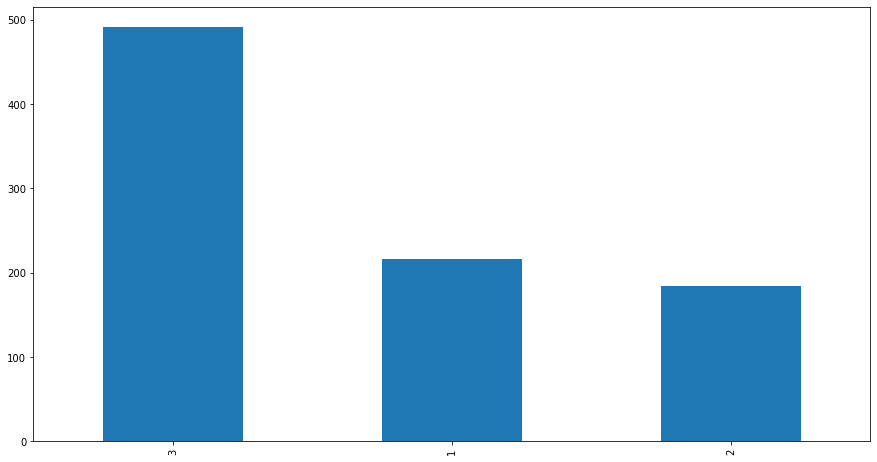

In [5]:
# Pclass - 
train.Pclass.value_counts().plot(kind='bar')
# Class 3 count is Higher and Class 2 has the lowest.

<AxesSubplot:>

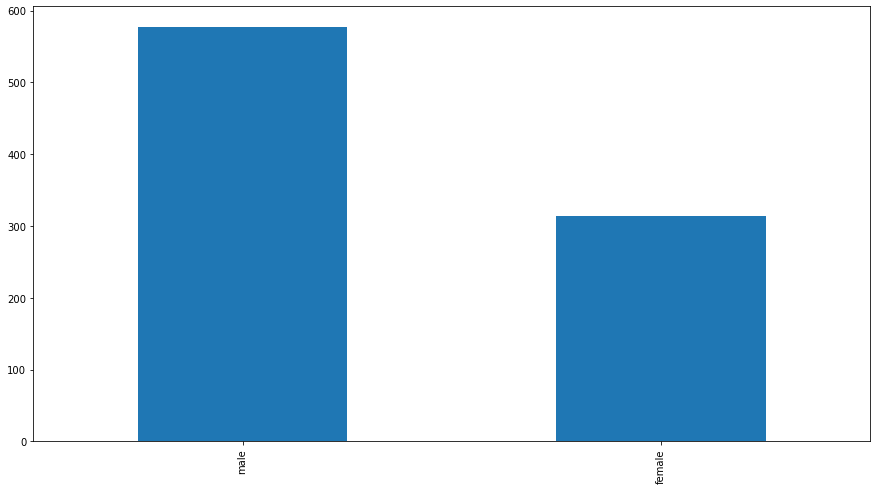

In [6]:
# Sex-
train.Sex.value_counts().plot(kind='bar')

<AxesSubplot:xlabel='Age', ylabel='Density'>

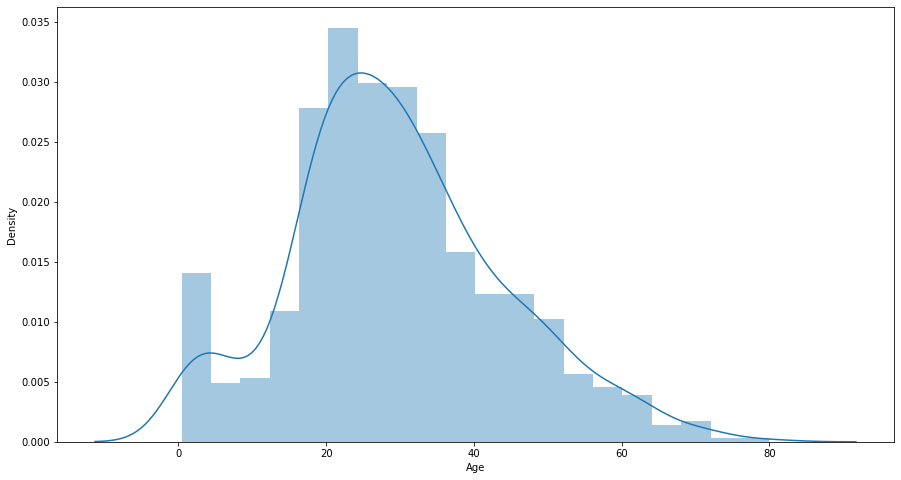

In [7]:
# Age -
sns.distplot(train.Age)
# Data appears to be Normal.

<AxesSubplot:xlabel='Fare', ylabel='Density'>

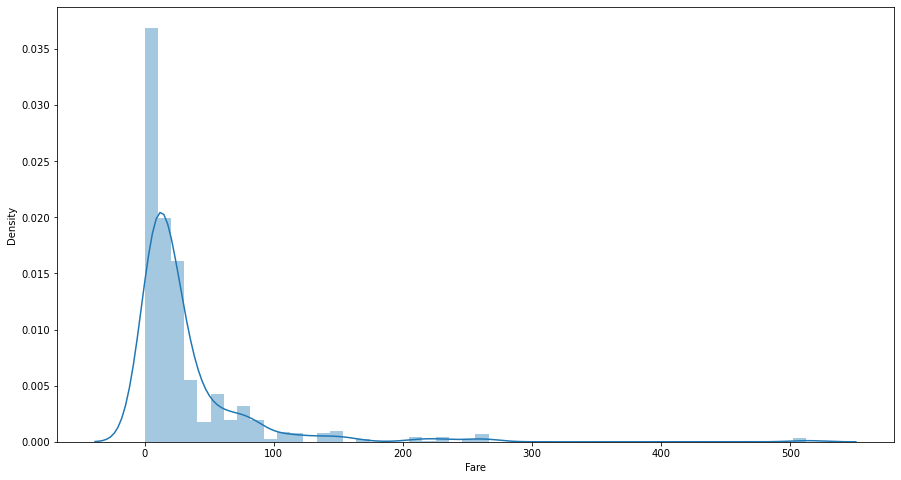

In [8]:
# Fare -
sns.distplot(train.Fare)

<AxesSubplot:xlabel='Fare', ylabel='Density'>

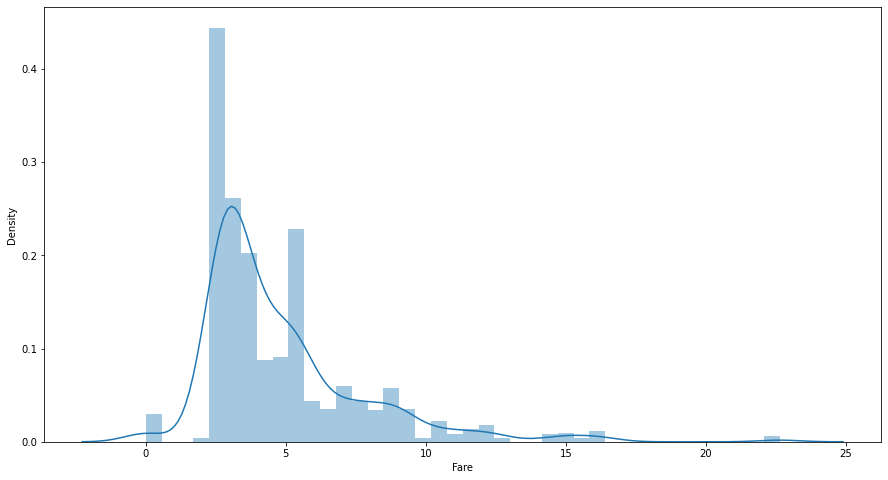

In [9]:
sns.distplot(np.sqrt(train.Fare))

In [10]:
# Feature Engineering - SibSp + Parch
train['Family'] = train.SibSp + train.Parch + 1
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [11]:
train.Family.value_counts()

1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: Family, dtype: int64

<AxesSubplot:xlabel='Family', ylabel='count'>

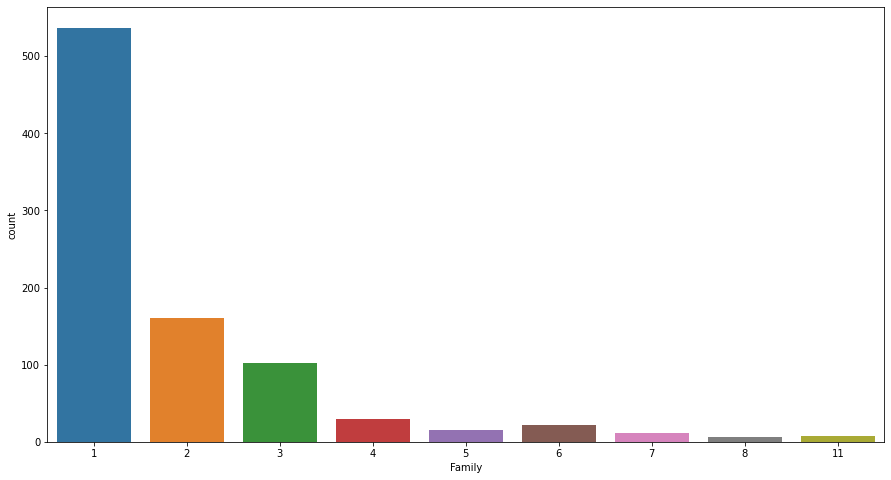

In [12]:
sns.countplot(x = train.Family)

In [13]:
# Generalising the Data :
def fam(x):
    if x>=4:
        return 'Large'
    elif x==3:
        return 'Medium'
    elif x==2:
        return 'Small'
    else:
        return 'Single'

In [14]:
train['Family_Cat'] = pd.Series(train.Family.apply(fam))
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family,Family_Cat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,Small
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,Small
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,Single
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,Small
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,Single


In [15]:
pd.crosstab(train.Survived,train.Family_Cat)
# Large Families Died whereas Medium and Small Families Survived.

Family_Cat,Large,Medium,Single,Small
Survived,,,,
0,60,43,374,72
1,31,59,163,89


<AxesSubplot:xlabel='Embarked', ylabel='count'>

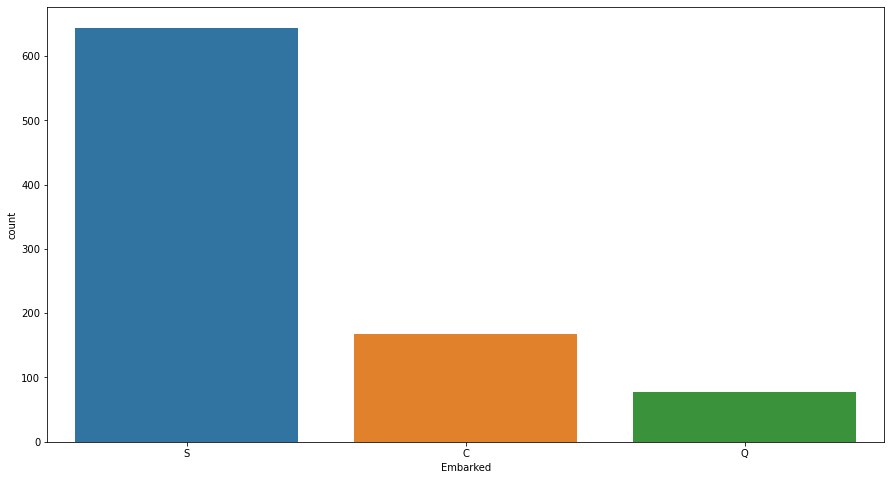

In [16]:
# Embarked - 
sns.countplot(x=train.Embarked)
# Max no. of people embarked from Southhampton and Lowest from Queenstown.

### Summary of Univariate Analysis:
* Fare is skewed, meaning people paid high fares as well, the range is 0-512
* Age appears to be normal, Avg age is 29.6 and Median age is 28.
* Majority of people boarded from **Southhampton**, while the fewest from Queenstown.
* We created New Variable Family and Family_Cat which we will use later in Bivariate Analysis.
* Hypothesis is Family Variable in Survival is Dependant on the Frequency/Count - Chi Squares.
* Males are more in comparison to Females on Titanic.
* Target Variable : People Survived are Less than the Ones who died.

### Bivariate Analysis :
* Num vs Num -

Text(0, 0.5, 'Fare')

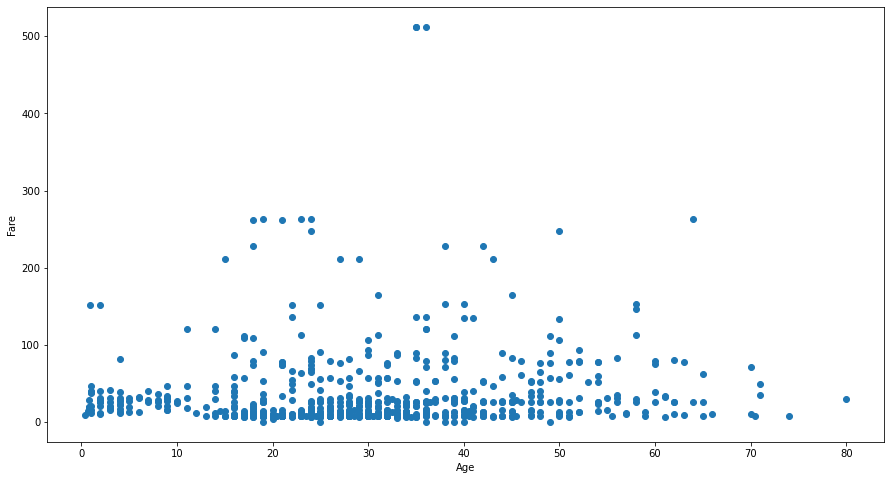

In [17]:
# Age vs Fare Paid - Scatterplot
plt.scatter(x=train.Age,y=train.Fare)
plt.xlabel('Age')
plt.ylabel('Fare')

<AxesSubplot:>

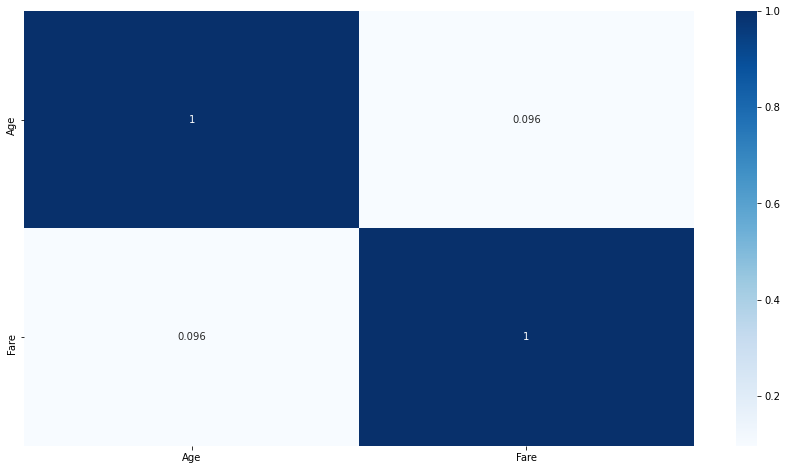

In [18]:
sns.heatmap(train[['Age','Fare']].corr(),annot=True,cmap='Blues')

* Num vs Cat -

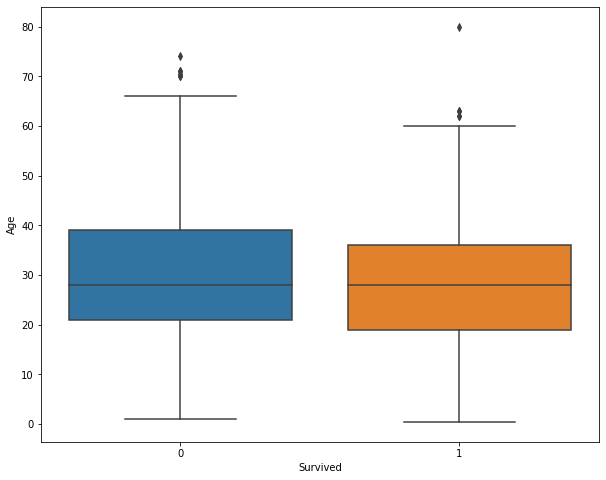

In [19]:
# Survived vs Age -
plt.figure(figsize=(10,8))
sns.boxplot(x='Survived',y='Age',data=train)
plt.show()

In [20]:
train.loc[train.Survived==0,'Age'].describe()

count    424.000000
mean      30.626179
std       14.172110
min        1.000000
25%       21.000000
50%       28.000000
75%       39.000000
max       74.000000
Name: Age, dtype: float64

In [21]:
train.loc[train.Survived==1,'Age'].describe()

count    290.000000
mean      28.343690
std       14.950952
min        0.420000
25%       19.000000
50%       28.000000
75%       36.000000
max       80.000000
Name: Age, dtype: float64

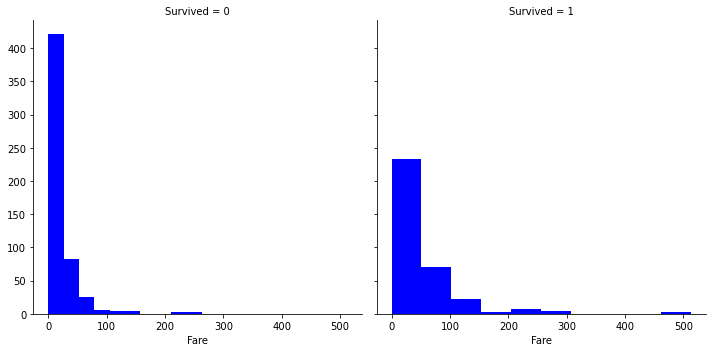

In [22]:
# Fare vs Survived -
g = sns.FacetGrid(data = train,col='Survived',height=5)
g.map(plt.hist,'Fare',color='b')
plt.show()

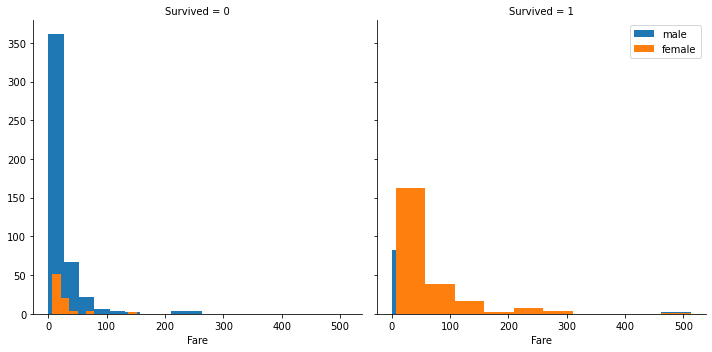

In [23]:
g = sns.FacetGrid(data = train,col='Survived',hue='Sex',height=5)
g.map(plt.hist,'Fare')
plt.legend()
plt.show()

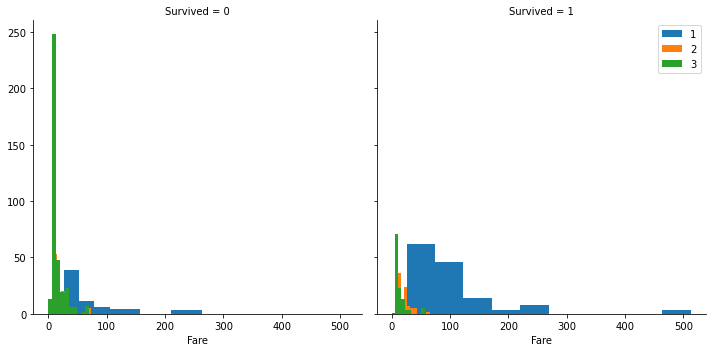

In [24]:
g = sns.FacetGrid(data = train,col='Survived',hue='Pclass',height=5)
g.map(plt.hist,'Fare')
plt.legend()
plt.show()

In [25]:
# Age vs Fare - T Test
train.Age.fillna(28,inplace=True)
train.Age.isnull().sum()

0

In [26]:
# H0 : Avg Age and Fare are Same. I.e No difference between Variables./ NO relation between Age and Fare
# H1 : H0 is False.

In [27]:
stats.ttest_ind(train.Age,train.Fare)
# H0 is True, Age and fair have No realtion.

Ttest_indResult(statistic=-1.6517448796950809, pvalue=0.09876295124022455)

In [28]:
# Age has something to do with Survived.
# H0 : There is no effect of Age on Survival
# H1 : There is some effect of Age on Survival
# One is Cat and Other is Num ~ Anova
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [29]:
model = ols('Age~Survived',data=train).fit()
print(sm.stats.anova_lm(model))

             df         sum_sq     mean_sq         F    PR(>F)
Survived    1.0     635.653685  635.653685  3.761528  0.052761
Residual  889.0  150230.469784  168.988155       NaN       NaN


In [30]:
model = ols('Age~Survived+Embarked+Family_Cat',data=train).fit()
print(sm.stats.anova_lm(model))

               df         sum_sq      mean_sq          F        PR(>F)
Embarked      2.0     255.106730   127.553365   0.822401  4.397119e-01
Family_Cat    3.0   12091.318121  4030.439374  25.986292  4.107165e-16
Survived      1.0     580.864687   580.864687   3.745130  5.328099e-02
Residual    882.0  136797.028866   155.098672        NaN           NaN


In [31]:
4.107165e-16 > 0.05
# Family_Cat has some relation with Age

False

In [32]:
5.328099e-02 > 0.05
# Target Variable has nothing to do with Age

True

In [33]:
# Family_Cat vs Survived - 
# H0: There is no effect of Family Category on Survival
# H1: There is some effect of Family Category on Survival
chistat,pval,df,exp = stats.chi2_contingency(pd.crosstab(train.Family_Cat,train.Survived))
print(chistat,pval,df,exp,sep='\n')

51.12182811790838
4.6082741465220125e-11
3
[[ 56.07070707  34.92929293]
 [ 62.84848485  39.15151515]
 [330.87878788 206.12121212]
 [ 99.2020202   61.7979798 ]]


* Since the Pvalue is less than 0.05, we can say that Family_Cat has an impact on Survival.
* From a ML point of view, the **Family_Cat is an important variable for Modelling.**